# Baseball Analytics & HR Analytics

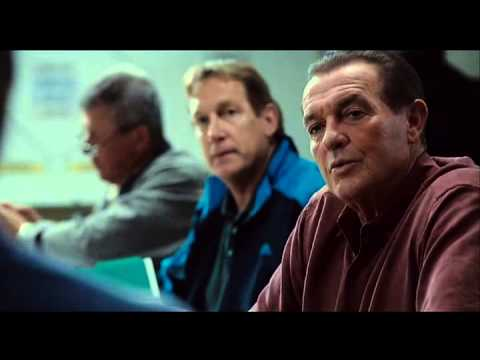

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('pWgyy_rlmag')

**Sabermetrics** is the apllication of statistical analysis to baseball data in order to measure in-game activity. The term Sabermetrics comes from saber (Society for American Baseball Research) and metrics (as in econometrics).

In 2003, Michael Lewis published Moneyball about **Billy Beane**, the **Oakland Athletics General Manager** since 1997. The book was centered around **Billy Beane's use of Sabemetrics to identify and recruit under-valued baseball players**. With this strategy, his team could achieve as many wins as teams with more than double the payroll. The figures below show the relationship between team salaries and number of wins for years: 1997, 2001, 2003, 2013. The green dot represents the Oakland Athletics, the blue dot represents the New York Yankees, and the red dot represents The Boston Red Sox. We can see that the **Oakland Athletics went from the underperforming team in 1997, to became a highly competitive team with a comparable number of wins to the New York Yankees. The Oakland Athletics made it to the play-offs in 4 successive years: 2000,2001,2002,2003**.

Source: http://adilmoujahid.com/posts/2014/07/baseball-analytics/ (reproduced from this page)

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://adilmoujahid.com/images/fig1.jpg")
Image(url= "http://adilmoujahid.com/images/fig2.jpg")

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#regression packages (machine learning)
import sklearn.linear_model as lm

#for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#regression (statistics)
import statsmodels.api as sm
from statsmodels.formula.api import ols

#ignore warning
import warnings
warnings.filterwarnings("ignore")

In [5]:
teams = pd.read_csv("data/baseball.csv")
teams.head()

,yearID,teamID,Rank,R,RA,G,W,H,BB,HBP,AB,SF,HR,2B,3B,salary,BA,OBP,SLG
0,2000,CHA,1,978,839,162,95,1615,591,53,5646,61,216,325,33,31133500,0.286043,0.355692,0.470067
1,2000,CLE,2,950,816,162,90,1639,685,51,5683,52,221,310,30,75880771,0.288404,0.367022,0.470174
2,2000,DET,3,823,827,162,79,1553,562,43,5644,49,177,307,41,58265167,0.275159,0.342648,0.438164
3,2000,KCA,4,879,930,162,77,1644,511,48,5709,70,150,281,27,23433000,0.287966,0.347586,0.425469
4,2000,MIN,5,748,880,162,69,1516,556,35,5615,51,116,325,49,16519500,0.269991,0.336743,0.407302


On Base Percentage (OBP, On Base Average, OBA) is a measure of how often a batter reaches base. 

The full formula is OBP = (Hits + Walks + Hit by Pitch) / (At Bats + Walks + Hit by Pitch + Sacrifice Flies). Batters are not credited with reaching base on an error or fielder's choice, and they are not charged with an opportunity if they make a sacrifice bunt.

All Time Leaders
Ted Williams	.482	(career)
Barry Bonds	    .609	(2004 season)

http://www.baseball-reference.com/bullpen/On_base_percentage

# Exploratory Data Analysis 

In [6]:
# correlation analysis
teams.corr()

,yearID,Rank,R,RA,G,W,H,BB,HBP,AB,SF,HR,2B,3B,salary,BA,OBP,SLG
yearID,1.000000,-0.000202,-0.408178,-0.391801,0.120592,0.002798,-0.309967,-0.274937,-0.226799,-0.154202,-0.245968,-0.272492,-0.219384,-0.094005,0.360808,-0.339005,-0.410184,-0.378158
Rank,-0.000202,1.000000,-0.474251,0.564920,-0.077022,-0.886474,-0.320440,-0.379702,-0.091782,-0.155763,-0.255092,-0.362639,-0.173265,0.045748,-0.308308,-0.351519,-0.461332,-0.420698
R,-0.408178,-0.474251,1.000000,0.205996,0.104248,0.549933,0.806592,0.585743,0.247722,0.614868,0.500949,0.700291,0.589721,0.107528,0.133647,0.811295,0.898274,0.915136
RA,-0.391801,0.564920,0.205996,1.000000,-0.017510,-0.632394,0.245639,0.003734,0.083455,0.273560,0.063746,0.149423,0.189500,0.101037,-0.313821,0.219393,0.156759,0.224955
G,0.120592,-0.077022,0.104248,-0.017510,1.000000,0.091498,0.116129,0.032035,-0.035818,0.198990,0.096895,0.080860,0.052023,0.015406,0.057450,0.082268,0.060409,0.088257
W,0.002798,-0.886474,0.549933,-0.632394,0.091498,1.000000,0.373127,0.423453,0.123263,0.187078,0.306111,0.416846,0.240574,-0.052721,0.359079,0.406908,0.526369,0.491474
H,-0.309967,-0.320440,0.806592,0.245639,0.116129,0.373127,1.000000,0.232830,0.083284,0.830452,0.497462,0.365363,0.607476,0.169893,0.159304,0.984048,0.809390,0.756042
BB,-0.274937,-0.379702,0.585743,0.003734,0.032035,0.423453,0.232830,1.000000,0.139443,0.115175,0.288142,0.424138,0.288112,-0.028190,0.085966,0.254640,0.726429,0.445555
HBP,-0.226799,-0.091782,0.247722,0.083455,-0.035818,0.123263,0.083284,0.139443,1.000000,0.042850,0.033716,0.266033,0.128028,-0.077730,-0.030119,0.091199,0.243492,0.233884
AB,-0.154202,-0.155763,0.614868,0.273560,0.198990,0.187078,0.830452,0.115175,0.042850,1.000000,0.290398,0.331565,0.540807,0.077190,0.124605,0.718483,0.537595,0.575732


<AxesSubplot:>

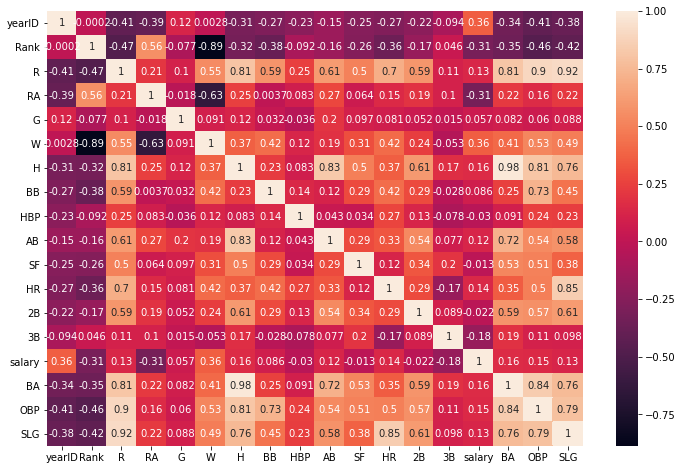

In [7]:
# correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(teams.corr(), annot=True)

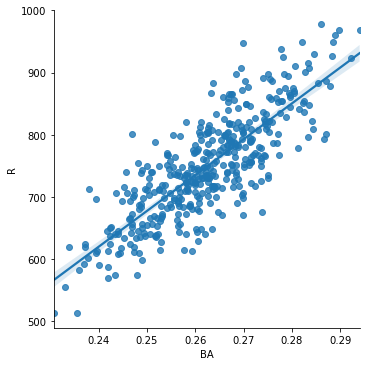

In [8]:
sns.lmplot(x='BA', y='R', data=teams);

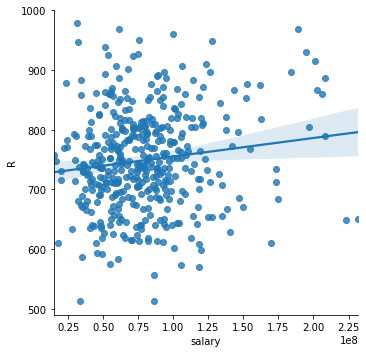

In [9]:
# choose another variable for lmplot with R
sns.lmplot(x='salary', y='R', data=teams);

# Model Development: Regression
- We use **scikit**, the python package for statistical analysis and data mining (predictive analytics)

In [10]:
#assigning columns to X and Y variables
X = teams['BA']
y = teams['R']

In [11]:
# We create the model and call it lr.
model1 = lm.LinearRegression()
# We train the model on our training dataset.
model1.fit(X[:,np.newaxis], y)    ## X needs to be 2d for LinearRegression so add [:,np.newaxis]
# Now, we predict points with our trained model.
model1_y = model1.predict(X[:,np.newaxis])

In [12]:
# The coefficients
print('Coefficients: ', model1.coef_)
# y-intercept
print("y-intercept ", model1.intercept_)

Coefficients:  [5761.59422]
y-intercept  -762.6742588554711


**Linear Regression Model: y = 5761x - 762**

One unit increase in BA increases R by about 5000

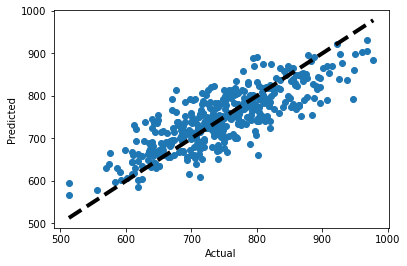

In [13]:
# try to evaluate the performance of our model's prediction using visualization

plt.subplots()
plt.scatter(y, model1_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [14]:
# Let's build 2nd model
X = teams['HBP']
y = teams['R'] 
model2 = lm.LinearRegression()
model2.fit(X[:,np.newaxis], y)
model2_y = model2.predict(X[:,np.newaxis])
print('Coefficients: ', model2.coef_)
print("y-intercept ", model2.intercept_)

Coefficients:  [1.53651252]
y-intercept  662.386393029709


In [15]:
# Choose a different variable as X and develop another (3rd) linear regression model (model3).
X = teams['salary']
y = teams['R'] 
model3 = lm.LinearRegression()
model3.fit(X[:,np.newaxis], y)
model3_y = model2.predict(X[:,np.newaxis])
print('Coefficients: ', model3.coef_)
print("y-intercept ", model2.intercept_)

Coefficients:  [3.09953161e-07]
y-intercept  662.386393029709


In [16]:
print("%.10f" % model3.coef_)

0.0000003100


# Model Evaluation
- Which model is better? **The goal of regression model is to minimize Sum of Squared Error (SSE)**

* **Sum of Squared Error ($SSE$)**: Sum of squared residuals or errors 
    - A low $SSE$ means the regression model fits well with the dataset 

* Mean Squared Error ($MSE$) 
    
    $= SSE  /  n$          
    
    (where n is the number of samples)

    
* **R-square** or **coefficient of determination**): 
    * A high $R-square$ means that the regression model fits well with the dataset (for the formular, see https://en.wikipedia.org/wiki/Coefficient_of_determination)


How is our R2 doing^^
![](https://files.training.databricks.com/images/r2d2.jpg)

### Low R sqaure
<img src="images/low_r_square.png">

### High R square
<img src="images/high_r_square.png">

In [17]:
print("mean square error: ", mean_squared_error(y, model1_y))
print(explained_variance_score(y, model1_y))

mean square error:  2394.377962621043
0.6582001186594721


In [18]:
print("mean square error: ", mean_squared_error(y, model2_y))
print(explained_variance_score(y, model2_y))

mean square error:  6575.322571074178
0.06136603758721215


In [19]:
# evaluate your model (3rd)
print("mean square error: ", mean_squared_error(y, model3_y))
print(explained_variance_score(y, model3_y))

mean square error:  1.823781709958278e+16
-438930582810.6707


# Appendix 

In [20]:
teams.head()

,yearID,teamID,Rank,R,RA,G,W,H,BB,HBP,AB,SF,HR,2B,3B,salary,BA,OBP,SLG
0,2000,CHA,1,978,839,162,95,1615,591,53,5646,61,216,325,33,31133500,0.286043,0.355692,0.470067
1,2000,CLE,2,950,816,162,90,1639,685,51,5683,52,221,310,30,75880771,0.288404,0.367022,0.470174
2,2000,DET,3,823,827,162,79,1553,562,43,5644,49,177,307,41,58265167,0.275159,0.342648,0.438164
3,2000,KCA,4,879,930,162,77,1644,511,48,5709,70,150,281,27,23433000,0.287966,0.347586,0.425469
4,2000,MIN,5,748,880,162,69,1516,556,35,5615,51,116,325,49,16519500,0.269991,0.336743,0.407302


In [21]:
# print the predicted y value (model 1)
print(model1_y)

[885.39068112 898.99262971 822.68290122 896.47110833 792.90487355
 835.34890187 775.45649042 822.6014438  803.10049273 717.23386387
 792.74893024 789.61262947 848.68844441 870.52552028 794.99661457
 817.03524829 652.09074452 837.53871675 774.97608869 710.52519608
 801.32198654 754.91663749 744.3973089  772.70992693 686.34943726
 839.79849467 717.40686726 765.55029916 931.19372464 701.5582311
 841.31241692 806.22028077 780.00735475 734.69508959 771.91303507
 774.57734604 772.03763531 752.24959553 668.24798895 724.65980405
 897.84153808 756.03772849 739.22212397 824.42451592 800.71057193
 790.31324509 739.00651359 684.02341254 748.15753846 660.11290023
 737.98105353 737.20591745 673.76643237 756.21588275 695.13011838
 775.81041939 770.12334563 704.73340534 686.65781507 921.25037686
 804.1655868  781.91888463 670.55284558 710.25362334 665.46785265
 821.48126889 830.95818681 741.47244711 657.00102286 695.20236301
 740.44046493 863.92587338 821.27272223 785.92084188 781.07714452
 746.040492

# Regression using Statsmodels
- http://statsmodels.sourceforge.net/
- Statsmodels is a Python module that allows users to explore data, estimate statistical models, and perform statistical tests. An extensive list of descriptive statistics, statistical tests, plotting functions, and result statistics are available for different types of data and each estimator.
- This package is an **alternative to scikit python package**

In [22]:
runs_reg_model1 = ols("R~BA",teams)
runs_reg1 = runs_reg_model1.fit()
print(runs_reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     804.9
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           1.74e-99
Time:                        12:52:23   Log-Likelihood:                -2229.9
No. Observations:                 420   AIC:                             4464.
Df Residuals:                     418   BIC:                             4472.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -762.6743     53.334    -14.300      0.0

In [23]:
runs_reg_model2 = ols("R~HBP",teams)
runs_reg2 = runs_reg_model2.fit()
print(runs_reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     27.33
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           2.72e-07
Time:                        12:52:23   Log-Likelihood:                -2442.1
No. Observations:                 420   AIC:                             4888.
Df Residuals:                     418   BIC:                             4896.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    662.3864     17.032     38.890      0.0

In [24]:
runs_reg2.mse_resid

6606.783444619986

- The first model has a R-squared of 0.658.

- The second model has a R-squared of 0.061.

- Based on this analysis, we could confirm that the first model using **BA** is a better model.

In [25]:
# Develop the 3rd model

runs_reg_model3 = ols("R~salary",teams)
runs_reg3 = runs_reg_model3.fit()
print(runs_reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     7.602
Date:                Fri, 19 Mar 2021   Prob (F-statistic):            0.00609
Time:                        12:52:23   Log-Likelihood:                -2451.6
No. Observations:                 420   AIC:                             4907.
Df Residuals:                     418   BIC:                             4915.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    724.1361      9.881     73.288      0.0

# References

- http://adilmoujahid.com/posts/2014/07/baseball-analytics/ (reproduced from this page)